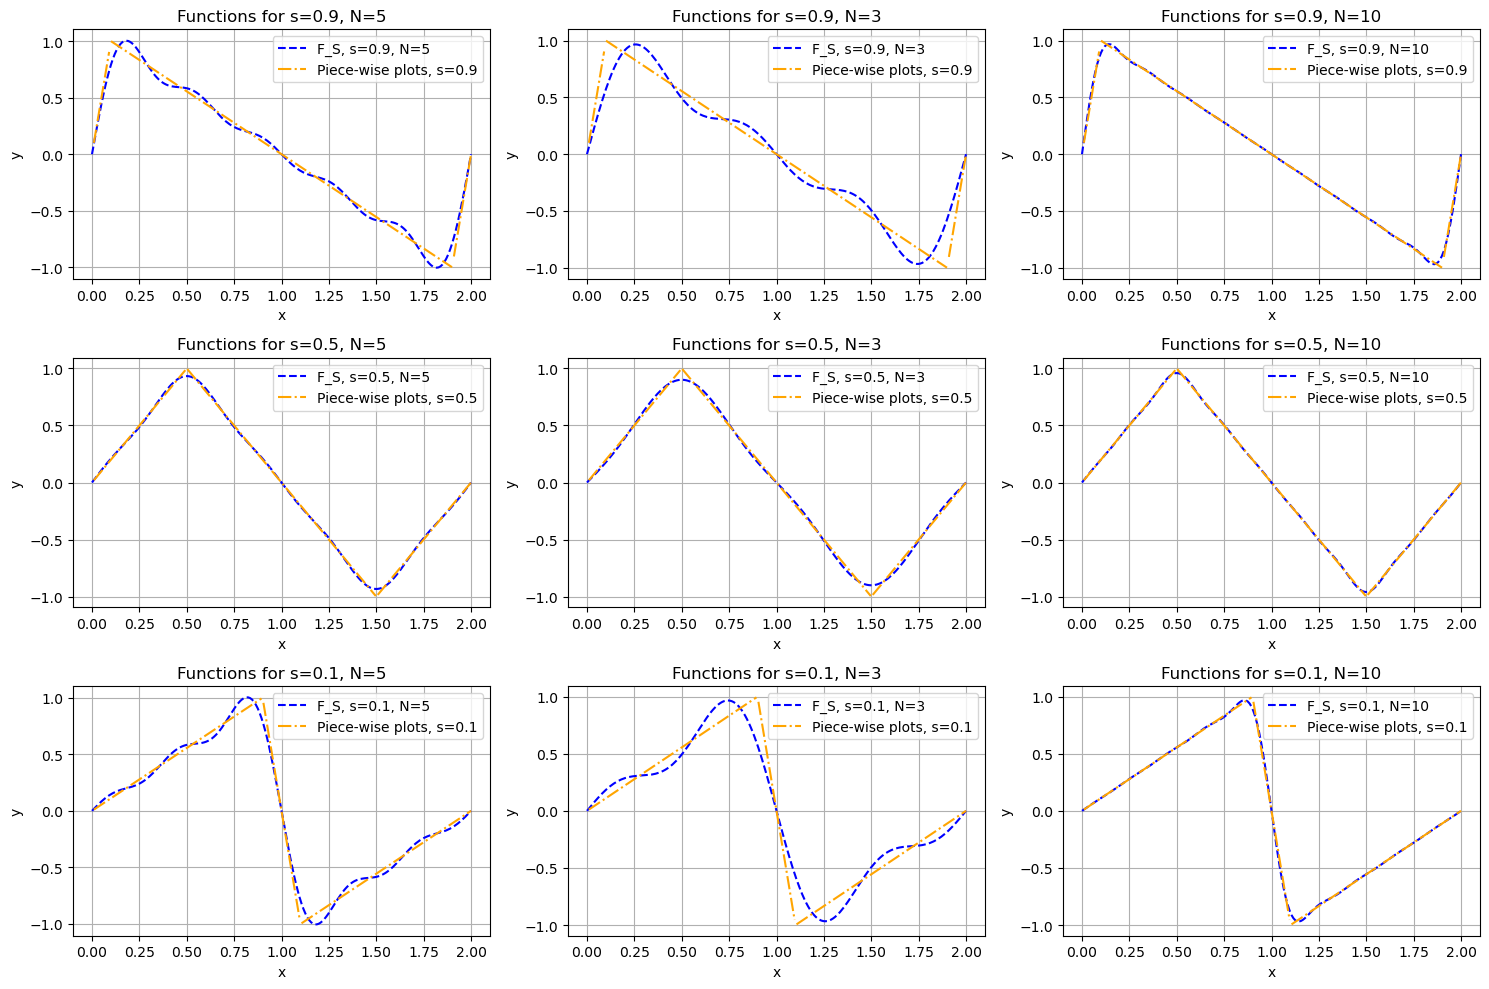

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# setting the variables

x = np.linspace(0, 2, 200) # 

L = 2

s_values = [0.9, 0.5, 0.1] # N and s values will be used latter for piece-wise subplots
N_values = [5, 3, 10]

# Defining fourier series 

def F_S(x, s, L, N):  # taking four posisionl arguments (x, s, L, N)
    sum_0 = 0
    n = 1
    while n <= N: 
        
        # This block code are pieces for building up {bn} function:
        ls = (L - 2 * s)
        angle1 = (np.pi * n * ls) / L
        angle2 = (2 * np.pi * n * s) / L
        part1 = (2 / ls) * (L * np.sin(angle1) - np.pi * n * ls * np.cos(angle1))
        part2 = (1 / s) * np.cos(np.pi * n) * (L * np.sin(angle2) - 2 * np.pi * n * s * np.cos(angle2))
        
        # integrating the pieces above to define {bn}
        bn = (1 / (n * np.pi) ** 2) * (part1 - part2)

        f = bn * np.sin(angle2 * x / s)  # {bn} multiplied by sin function to define fourier series function
        sum_0 += f
        n += 1

    return sum_0   # return the sum of forier series function for given s from 1 to given N:

# Creating subplots

fig, axes = plt.subplots(3,3, figsize=(15, 10))

# Looping through fourier series and piece-wise plots for different values of s_valuesb and N_values
for i, s in enumerate(s_values):  
    for j, N in enumerate(N_values):
        ax = axes[i, j]

        # Plot F_S subplots for different s and N values
        ax.plot(x, F_S(x, s, L, N), label=f'F_S, s={s}, N={N}', color='blue', linestyle='--')
        ax.set_title(f'Functions for s={s}, N={N}')  # setting the title

        # setting up the intervals {interval_1, interval_2, interval_3} to be used in piece-wise subplots
        interval_1 = (0 < x) & (x <= (L/2) - s)
        interval_2 = ((L/2) - s < x) & (x <= (L/2) + s)
        interval_3 = ((L/2) + s < x) & (x <= L)
        
       # plotting piece-wise subplots with different valuse of s and N
        ax.plot(x[interval_1], (2 / (L - 2*s)) * x[interval_1], label=f'Piece-wise plots, s={s}', color='orange', linestyle='-.')
        ax.plot(x[interval_2], (1 / s) * ((L/2) - x[interval_2]), color='orange', linestyle='-.')
        ax.plot(x[interval_3], (2 / (L - 2*s)) * (x[interval_3] - L), color='orange', linestyle='-.')
        ax.set_xlabel("x")  # setting x and y labels
        ax.set_ylabel("y")
        ax.grid()
        ax.legend()   # labeling for Fourier series function and piece-wisw plots
       
 # Adjust layout

plt.savefig('Fouries series and piece-wise subplot.jpg')
plt.tight_layout()
plt.show()